In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
data_Mv411_48h = pd.read_excel('Average_CD33-CAR_Mv411.xlsx', header=2, sheet_name=1)
Specific_Mv411_48h = data_Mv411_48h.loc[7:,['Unnamed: 3','Unnamed: 5','Unnamed: 7']]
data_Mv411_72h = pd.read_excel('Average_CD33-CAR_Mv411.xlsx', header=2, sheet_name=2)
Specific_Mv411_72h = data_Mv411_72h.loc[7:,['Unnamed: 3','Unnamed: 5','Unnamed: 7']]

In [3]:
def mean_std(arr):
    mean, std= [],[]
    for i in arr:
        if isinstance(i[0], str):
            i = np.delete(i,0)
        mean.append(np.mean(i))
        std.append(np.std(i))
    return mean,std

In [4]:
D515_NK_48h = np.column_stack((mean_std(Specific_Mv411_48h.iloc[:,0].values.reshape(-1,3))))
D521_NK_48h = np.column_stack((mean_std(Specific_Mv411_48h.iloc[:,1].values.reshape(-1,3))))
D774_NK_48h = np.column_stack((mean_std(Specific_Mv411_48h.iloc[:,2].values.reshape(-1,3))))

D515_NK_72h = np.column_stack((mean_std(Specific_Mv411_72h.iloc[:,0].values.reshape(-1,3))))
D521_NK_72h = np.column_stack((mean_std(Specific_Mv411_72h.iloc[:,1].values.reshape(-1,3))))
D774_NK_72h = np.column_stack((mean_std(Specific_Mv411_72h.iloc[:,2].values.reshape(-1,3))))

In [5]:
ET_ratio = ['2.5:1','1.25:1','0.625:1','0.313:1']
ET_ratio_num = np.arange(len(ET_ratio))

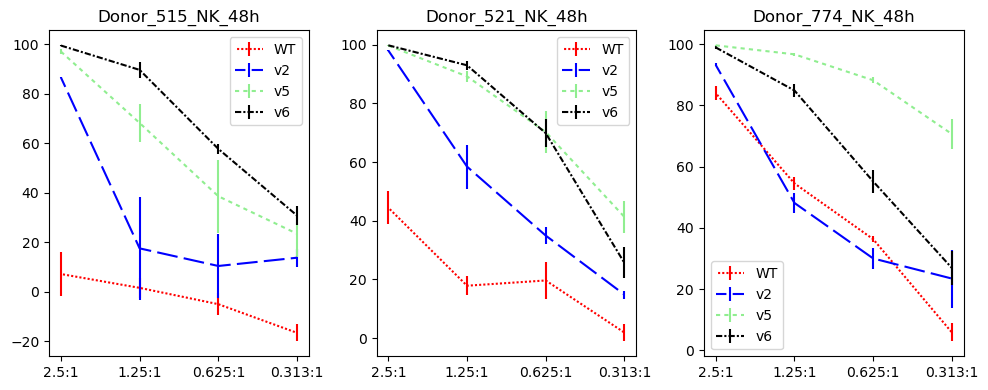

In [12]:
A = [D515_NK_48h,D521_NK_48h,D774_NK_48h]
ls = [(1,(1,1)),(5, (10, 3)), (0,(2,2)), (0, (3, 1, 1, 1))]
B = ['Donor_515_NK_48h','Donor_521_NK_48h','Donor_774_NK_48h']
fig,ax = plt.subplots(1,3,figsize = (10,4))
lbs = ['WT','v2','v5','v6'] 
cls = ['r','b', 'lightgreen','black']
for j in range(3):
    for i in range(4):
        ax[j].errorbar(ET_ratio_num, np.flip(np.split(A[j],4)[i][:,0]), yerr = np.flip(np.split(A[j],4)[i][:,1]),color =f'{cls[i]}',label=f'{lbs[i]}',linestyle = ls[i])
        ax[j].set_xticks(ET_ratio_num,ET_ratio)
        ax[j].legend()
        ax[j].set_title(f'{B[j]}')
plt.tight_layout()
plt.savefig('Kiles_Mv411_48h.png')
plt.show()

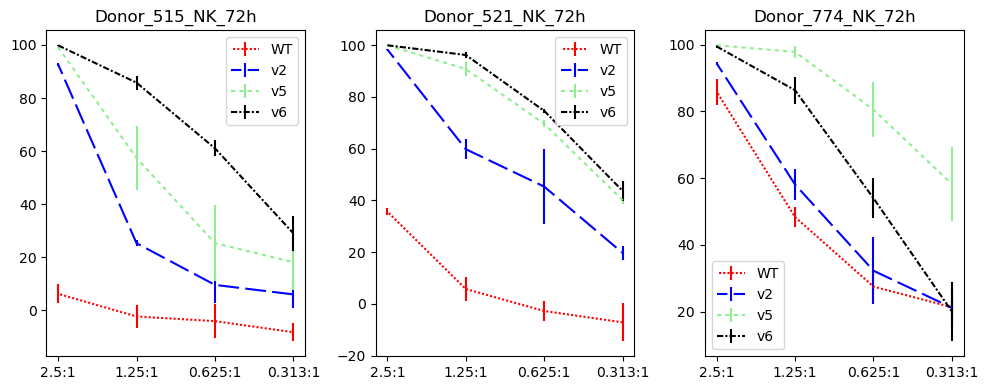

In [13]:
A = [D515_NK_72h,D521_NK_72h,D774_NK_72h]
ls = [(1,(1,1)),(5, (10, 3)), (0,(2,2)), (0, (3, 1, 1, 1))]
B = ['Donor_515_NK_72h','Donor_521_NK_72h','Donor_774_NK_72h']
fig,ax = plt.subplots(1,3,figsize = (10,4))
lbs = ['WT','v2','v5','v6']
cls = ['r','b', 'lightgreen','black']
for j in range(3):
    for i in range(4):
        ax[j].errorbar(ET_ratio_num, np.flip(np.split(A[j],4)[i][:,0]), yerr = np.flip(np.split(A[j],4)[i][:,1]),color =f'{cls[i]}',label=f'{lbs[i]}',linestyle = ls[i])
        ax[j].set_xticks(ET_ratio_num,ET_ratio)
        ax[j].legend()
        ax[j].set_title(f'{B[j]}')
plt.tight_layout()
plt.savefig('Kiles_Mv411_72h.png')
plt.show()